# Optimización de código 

In [2]:
# Librerías a usar en todo el programa
import pandas as pd
import numpy as np
import time,math 
import matplotlib.pyplot as plt
from functools import reduce

# Tarea 2:

1. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
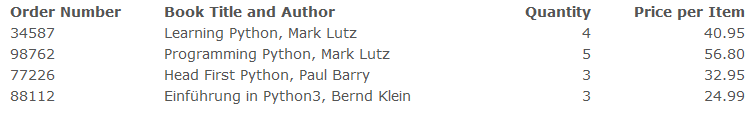
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

`orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]`
           
2. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`. Recuerde el precio del pedido del producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €.

3. Resolver los anteriores ejercicios usando pandas (DataFrame)

## Sol. Berlin Preciado 

E1.

In [2]:
#Solución 1
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

# El resultado debe ser como muestro en el resultado de esta celda

In [3]:
o1= list(map(lambda x: (x[0], x[2]*x[3] if x[2]*x[3] >= 100 else x[2]*x[3]+10 ), orders))
print("La orden y precios totales son:")
o1

La orden y precios totales son:


[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

In [4]:
#Solucion 2

Ej.2

## Sol. Berlin Preciado

In [5]:
# Solución 1
orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]



In [6]:
o2= list(map(lambda x: (x[0], reduce(lambda x,y: x+y, list(map(lambda y:y[1]*y[2] if y[1]*y[2]>100 else y[1]*y[2]+10, x[1:])))),orders))
print("La orden y precios totales son:")
o2

La orden y precios totales son:


[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

In [7]:
# Esta debe de ser su solución

Ej.3

In [3]:
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

import pandas as pd 
orders=pd.DataFrame(orders)


orders["Total"]=(orders.iloc[:,2]*orders.iloc[:,3]).apply(lambda x:x if x>=100 else x+10)


orders.drop([1, 2,3], axis=1, inplace=True)
orders

0   Total
0  34587  163.80
1  98762  284.00
2  77226  108.85
3  88112   84.97

In [6]:
orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]

df2 = pd.DataFrame(orders, columns = ["0", "Orden A", "Orden B","Orden C"])
df2.replace((None,None,None), np.zeros((3,), dtype = "i,i,i"),inplace=True)

df2["FA"]= df2["Orden A"].apply(lambda x: (x[1]*x[2]if x[1]*x[2] >= 100 else x[1]*x[2]+10) ,orders)
df2["FB"]= df2["Orden B"].apply(lambda x: (x[1]*x[2]if x[1]*x[2] >= 100 else x[1]*x[2]+10),orders)
df2["FC"]= df2["Orden C"].apply(lambda x: (x[1]*x[2]) ,orders)
df2["Total"] = df2["FA"]+df2["FB"]+df2["FC"] 
df2
df2.drop(["Orden A","Orden B","Orden C","FA","FB","FC"], axis=1).set_index("0")

Total
0        
1  688.33
2  504.46
3  374.80
4  502.57

4. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

## Estudiante Berlín Preciado

In [8]:
## Solucion 1
lista='the notion of a lambda function goes all the way back to the origin of computer science'
palabras= lista.split()
resultado4_dbh = list(filter(lambda x: len(x)>4, palabras))

5. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

# Estudiante Berlín Preciado

In [9]:
# Solución 1
import numpy as np
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(temperatures)


[ 35.97387961  99.13294268  92.6178302   99.69549478  63.21119535
  73.90387697  95.50028838  99.21476553  36.98251238 101.45813729
 100.5917418   89.38159435  89.52156589  83.8084752   28.37990868
  68.75395211  45.86132067  36.58307493  56.32208365  33.96219302
  45.29071318  74.86289938  66.51091383  88.19316186  94.26635864
  46.83131624 109.60744472 109.68427993  44.55796499  92.84146259]


In [10]:
#FILTRAR CANTIDADES MENORES A 80 Y MAYORES O IGUALES A 32
result= list( filter((lambda x: x < 80 and x >=32), temperatures))
print("Las cantidades menores a 80 y mayores o iguales a 32 son:",result)

Las cantidades menores a 80 y mayores o iguales a 32 son: [35.97387961379455, 63.211195349983264, 73.90387696517755, 36.982512376595906, 68.75395211338406, 45.86132066984196, 36.58307493022292, 56.322083650154724, 33.9621930206693, 45.29071317816652, 74.86289938282341, 66.51091382521807, 46.831316244170544, 44.55796498523391]


In [11]:
# Solucion 2

6. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations
> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

## Sol. Berlin Preciado

In [12]:
########### Solución 5
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)

[[17 97]
 [22 33]
 [37 46]
 [57 28]
 [11 25]
 [14  2]
 [74 16]
 [12 37]
 [35 21]
 [66 65]
 [86 58]
 [67 81]
 [ 0 48]
 [28 66]
 [76 22]
 [46 47]
 [64  7]
 [88 94]
 [65 13]
 [75 89]
 [23 17]
 [36 63]
 [62 36]
 [64 17]
 [18 19]
 [88 41]
 [21 49]
 [98 36]
 [81 73]
 [62 90]]


In [13]:
# Respuesta
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])

result= np.minimum.reduce(point_xy)
result

array([0, 2])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga
</footer>

## Mateo Verea

In [23]:
########### Solución 1
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]


res=[]
fin=[(orders[i][0],operator.mul(orders[i][2],orders[i][3]) if orders[i][2]*orders[i][3]>=100 else orders[i][2]*orders[i][3]+10)for i in range(len(orders))]

finmp = list(map(lambda x: x if x[1] >= 100 else (x[0], x[1] + 10), map(lambda x: (x[0],x[2] * x[3]), orders)))
finmp

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

In [24]:
##### Solución 2
orders2 = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]


fin2 = list(map(lambda x : (x[0], reduce(lambda y1, y2 : y1 + y2, list(map(lambda x1 : x1[1] * x1[2] if x1[1] * x1[2] >= 100 else x1[1] * x1[2] + 10, x[1:])))), orders2))
fin2

[(1, 688.3299999999999),
 (2, 504.46000000000004),
 (3, 374.79999999999995),
 (4, 502.57)]

In [37]:
##### Solución 3
condf = np.array([['','Orden','Costo'],
                [list(map(lambda x: x if x[1] >= 100 else (x[0], x[1] + 10), map(lambda x: (x[0],x[2] * x[3]), orders)))]
                
print(pd.DataFrame(data=condf[1:,1:],
                  index=condf[1:,0],
                  columns=condf[0,1:]))

SyntaxError: invalid syntax (<ipython-input-37-4ebaa4b8a984>, line 4)

In [25]:
##### Solución 4
lista='the notion of a lambda function goes all the way back to the origin of computer science'
spl=lista.split()


[spl[i] for i in range(len(spl)) if range(len(spl[i])>=4)]
#confilter=list(map(lambda i:list(map(filter(lambda x:(range(len(split[i])))>=4), split[i])), split))
#confilter
#conf = list(filter(lambda x: len(x)>4, spl))
#conf
pal= list(filter(lambda x: len(x)>=4, spl))
pal

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

In [26]:
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(temperatures)

[ 35.97387961  99.13294268  92.6178302   99.69549478  63.21119535
  73.90387697  95.50028838  99.21476553  36.98251238 101.45813729
 100.5917418   89.38159435  89.52156589  83.8084752   28.37990868
  68.75395211  45.86132067  36.58307493  56.32208365  33.96219302
  45.29071318  74.86289938  66.51091383  88.19316186  94.26635864
  46.83131624 109.60744472 109.68427993  44.55796499  92.84146259]


In [27]:
temp = list(temperatures)
t = list(filter(lambda x: 80>= x >= 32 , temp))
t

[35.97387961379455,
 63.211195349983264,
 73.90387696517755,
 36.982512376595906,
 68.75395211338406,
 45.86132066984196,
 36.58307493022292,
 56.322083650154724,
 33.9621930206693,
 45.29071317816652,
 74.86289938282341,
 66.51091382521807,
 46.831316244170544,
 44.55796498523391]

In [28]:
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)

[[17 97]
 [22 33]
 [37 46]
 [57 28]
 [11 25]
 [14  2]
 [74 16]
 [12 37]
 [35 21]
 [66 65]
 [86 58]
 [67 81]
 [ 0 48]
 [28 66]
 [76 22]
 [46 47]
 [64  7]
 [88 94]
 [65 13]
 [75 89]
 [23 17]
 [36 63]
 [62 36]
 [64 17]
 [18 19]
 [88 41]
 [21 49]
 [98 36]
 [81 73]
 [62 90]]


In [29]:
np.minimum.reduce(point_xy)

array([0, 2])